In [1]:
!pip3 install torch

You should consider upgrading via the 'pip install --upgrade pip' command.


# Model Creation

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from sklearn import datasets

In [3]:
# Get linearly separable dataset, clustered around two points

n_pts = 100
centers = [[-0.5, 0.5],[0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123,centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

print(X)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [4]:
def scatter_plot():
    '''
    Print a scatterplot
    '''
    plt.scatter(X[y==0,0], X[y==0, 1]) # Where labels are 0
    plt.scatter(X[y==1,0], X[y==1, 1]) # Where labels are 1
# X and y are numpy arrays, they must be in the form of tensors.

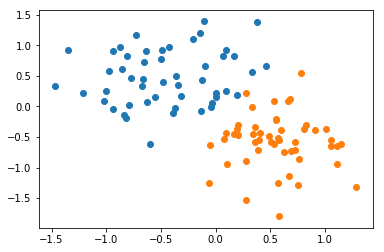

In [5]:
# Plot Raw Data
scatter_plot()

In [8]:
class Model(nn.Module):
    '''
    Class of a perceptron for linear classifier (logistic regression)
    '''
    def __init__(self,input_size, output_size):
        super().__init__() # inherit from parent class
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        '''
        pass forward through linear model and apply sigmoid (to convert output to probability)
        '''
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
    

In [9]:
# Set seed, initialize model and print model parameters (random)

torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [10]:
[w,b] = model.parameters()
w1, w2 = w.view(2) # unpack Weights

def get_params():
    return(w1.item(), w2.item(), b[0].item())

In [11]:
def plot_fit(title):
    plt.title = title
    # 0 = w1x1 + w2x2 + b # Equation Line
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0,2.0]) # numbers here is range of data in the plot above
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1,x2, 'r')
    scatter_plot()
    

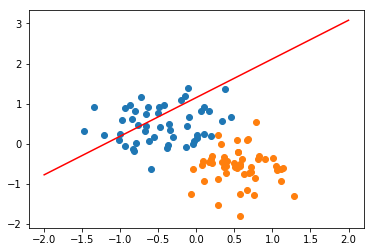

In [12]:
plot_fit('Initial Model')

# Model Training

1. Compute error (loss) of the model based on cross entropy criterian.

2. Take the gradient of the loss function (derivative of the error).  Subtract this from the weights and it will update them in the direction of the least error.

3. Train with n number of epochs

In [13]:
# Step 1 - Cross Entropy
criterion = nn.BCELoss()

# Step 2 - Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [14]:
# Step 3 - Train
epochs = 2000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:",i,"loss",loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad() # Set gradient to zero because they accumulate between ruins
    loss.backward() # Compute the gradient
    optimizer.step() # Update the parameters
    

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.617464005947113
epoch: 2 loss 0.6164201498031616
epoch: 3 loss 0.6153794527053833
epoch: 4 loss 0.614342451095581
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.6122783422470093
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280616760254
epoch: 9 loss 0.6092080473899841
epoch: 10 loss 0.6081910729408264
epoch: 11 loss 0.6071775555610657
epoch: 12 loss 0.606167733669281
epoch: 13 loss 0.6051608920097351
epoch: 14 loss 0.6041576266288757
epoch: 15 loss 0.6031574606895447
epoch: 16 loss 0.602160632610321
epoch: 17 loss 0.6011670827865601
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.599189817905426
epoch: 20 loss 0.5982060432434082
epoch: 21 loss 0.5972254276275635
epoch: 22 loss 0.5962479114532471
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943028926849365
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705101013184
epoch: 27 loss 0.5914090275764465
epoch: 28 loss 0.5904508829116821
epoch: 29 loss 0.589495718479

epoch: 291 loss 0.41802260279655457
epoch: 292 loss 0.4175826609134674
epoch: 293 loss 0.4171435236930847
epoch: 294 loss 0.4167054295539856
epoch: 295 loss 0.4162687063217163
epoch: 296 loss 0.41583287715911865
epoch: 297 loss 0.4153984785079956
epoch: 298 loss 0.4149649739265442
epoch: 299 loss 0.4145326316356659
epoch: 300 loss 0.41410133242607117
epoch: 301 loss 0.4136713147163391
epoch: 302 loss 0.4132422208786011
epoch: 303 loss 0.4128142297267914
epoch: 304 loss 0.4123874604701996
epoch: 305 loss 0.4119616448879242
epoch: 306 loss 0.4115370213985443
epoch: 307 loss 0.41111335158348083
epoch: 308 loss 0.4106908440589905
epoch: 309 loss 0.4102693796157837
epoch: 310 loss 0.40984901785850525
epoch: 311 loss 0.4094295799732208
epoch: 312 loss 0.4090114235877991
epoch: 313 loss 0.4085941016674042
epoch: 314 loss 0.40817803144454956
epoch: 315 loss 0.4077627956867218
epoch: 316 loss 0.40734875202178955
epoch: 317 loss 0.40693560242652893
epoch: 318 loss 0.40652385354042053
epoch: 319 

epoch: 578 loss 0.3260354995727539
epoch: 579 loss 0.32580316066741943
epoch: 580 loss 0.32557129859924316
epoch: 581 loss 0.3253398835659027
epoch: 582 loss 0.3251088261604309
epoch: 583 loss 0.3248782753944397
epoch: 584 loss 0.3246481418609619
epoch: 585 loss 0.32441848516464233
epoch: 586 loss 0.3241891860961914
epoch: 587 loss 0.32396042346954346
epoch: 588 loss 0.32373201847076416
epoch: 589 loss 0.32350409030914307
epoch: 590 loss 0.3232766091823578
epoch: 591 loss 0.32304951548576355
epoch: 592 loss 0.32282280921936035
epoch: 593 loss 0.3225966691970825
epoch: 594 loss 0.3223707973957062
epoch: 595 loss 0.3221454918384552
epoch: 596 loss 0.3219205439090729
epoch: 597 loss 0.32169604301452637
epoch: 598 loss 0.3214719295501709
epoch: 599 loss 0.32124829292297363
epoch: 600 loss 0.32102492451667786
epoch: 601 loss 0.3208022713661194
epoch: 602 loss 0.3205796778202057
epoch: 603 loss 0.3203578293323517
epoch: 604 loss 0.3201361894607544
epoch: 605 loss 0.3199150562286377
epoch: 60

epoch: 869 loss 0.273075670003891
epoch: 870 loss 0.27293312549591064
epoch: 871 loss 0.2727908194065094
epoch: 872 loss 0.27264878153800964
epoch: 873 loss 0.2725067734718323
epoch: 874 loss 0.27236512303352356
epoch: 875 loss 0.2722237706184387
epoch: 876 loss 0.2720823884010315
epoch: 877 loss 0.2719413638114929
epoch: 878 loss 0.2718004882335663
epoch: 879 loss 0.27165988087654114
epoch: 880 loss 0.27151942253112793
epoch: 881 loss 0.2713792622089386
epoch: 882 loss 0.2712392210960388
epoch: 883 loss 0.271099328994751
epoch: 884 loss 0.2709597647190094
epoch: 885 loss 0.27082037925720215
epoch: 886 loss 0.27068111300468445
epoch: 887 loss 0.270542174577713
epoch: 888 loss 0.27040329575538635
epoch: 889 loss 0.2702646255493164
epoch: 890 loss 0.27012625336647034
epoch: 891 loss 0.2699880301952362
epoch: 892 loss 0.26985010504722595
epoch: 893 loss 0.2697122395038605
epoch: 894 loss 0.26957467198371887
epoch: 895 loss 0.26943716406822205
epoch: 896 loss 0.2692999839782715
epoch: 897 

epoch: 1151 loss 0.23973867297172546
epoch: 1152 loss 0.2396405190229416
epoch: 1153 loss 0.23954252898693085
epoch: 1154 loss 0.23944473266601562
epoch: 1155 loss 0.23934704065322876
epoch: 1156 loss 0.2392493039369583
epoch: 1157 loss 0.23915190994739532
epoch: 1158 loss 0.23905442655086517
epoch: 1159 loss 0.23895719647407532
epoch: 1160 loss 0.23886001110076904
epoch: 1161 loss 0.2387629747390747
epoch: 1162 loss 0.2386661022901535
epoch: 1163 loss 0.2385692447423935
epoch: 1164 loss 0.2384725958108902
epoch: 1165 loss 0.23837602138519287
epoch: 1166 loss 0.23827941715717316
epoch: 1167 loss 0.23818311095237732
epoch: 1168 loss 0.23808692395687103
epoch: 1169 loss 0.23799072206020355
epoch: 1170 loss 0.23789472877979279
epoch: 1171 loss 0.23779883980751038
epoch: 1172 loss 0.2377031147480011
epoch: 1173 loss 0.2376074194908142
epoch: 1174 loss 0.23751191794872284
epoch: 1175 loss 0.2374163269996643
epoch: 1176 loss 0.23732101917266846
epoch: 1177 loss 0.23722580075263977
epoch: 117

epoch: 1421 loss 0.21688854694366455
epoch: 1422 loss 0.21681548655033112
epoch: 1423 loss 0.21674251556396484
epoch: 1424 loss 0.21666963398456573
epoch: 1425 loss 0.2165968120098114
epoch: 1426 loss 0.21652406454086304
epoch: 1427 loss 0.21645139157772064
epoch: 1428 loss 0.2163788229227066
epoch: 1429 loss 0.21630626916885376
epoch: 1430 loss 0.21623381972312927
epoch: 1431 loss 0.21616145968437195
epoch: 1432 loss 0.2160891592502594
epoch: 1433 loss 0.21601684391498566
epoch: 1434 loss 0.21594469249248505
epoch: 1435 loss 0.2158726453781128
epoch: 1436 loss 0.21580056846141815
epoch: 1437 loss 0.21572868525981903
epoch: 1438 loss 0.21565675735473633
epoch: 1439 loss 0.21558493375778198
epoch: 1440 loss 0.2155131846666336
epoch: 1441 loss 0.21544155478477478
epoch: 1442 loss 0.21536996960639954
epoch: 1443 loss 0.2152983695268631
epoch: 1444 loss 0.21522705256938934
epoch: 1445 loss 0.21515561640262604
epoch: 1446 loss 0.2150842696428299
epoch: 1447 loss 0.21501314640045166
epoch: 1

epoch: 1709 loss 0.19847726821899414
epoch: 1710 loss 0.19842126965522766
epoch: 1711 loss 0.19836539030075073
epoch: 1712 loss 0.19830943644046783
epoch: 1713 loss 0.19825370609760284
epoch: 1714 loss 0.19819779694080353
epoch: 1715 loss 0.19814209640026093
epoch: 1716 loss 0.1980864703655243
epoch: 1717 loss 0.19803079962730408
epoch: 1718 loss 0.19797520339488983
epoch: 1719 loss 0.19791969656944275
epoch: 1720 loss 0.1978641152381897
epoch: 1721 loss 0.19780869781970978
epoch: 1722 loss 0.19775335490703583
epoch: 1723 loss 0.19769792258739471
epoch: 1724 loss 0.19764262437820435
epoch: 1725 loss 0.19758734107017517
epoch: 1726 loss 0.19753216207027435
epoch: 1727 loss 0.19747698307037354
epoch: 1728 loss 0.19742180407047272
epoch: 1729 loss 0.19736675918102264
epoch: 1730 loss 0.19731168448925018
epoch: 1731 loss 0.19725675880908966
epoch: 1732 loss 0.19720180332660675
epoch: 1733 loss 0.19714689254760742
epoch: 1734 loss 0.19709211587905884
epoch: 1735 loss 0.19703730940818787
epo

epoch: 1997 loss 0.18410047888755798
epoch: 1998 loss 0.18405593931674957
epoch: 1999 loss 0.18401144444942474


Text(0.5, 0, 'epoch')

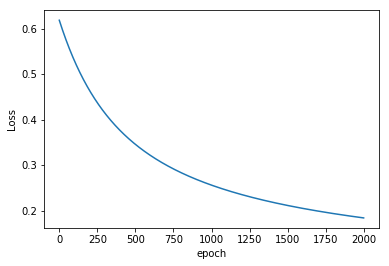

In [15]:
# plot the loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

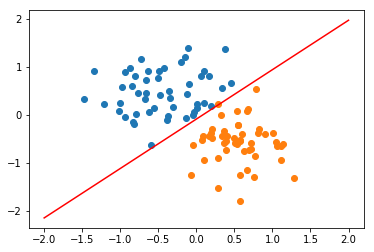

In [16]:
# Plot trained model on data
plot_fit('Trained Model')

# Testing

Red point positive probability = 0.979621171951294
Black point positive probability = 0.014588028192520142


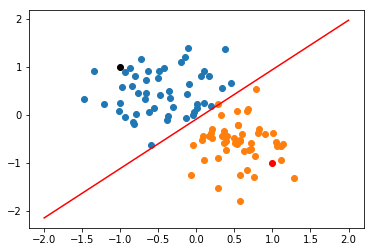

In [17]:
# Define some testing points
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])

# Plot the test points
plt.plot(point1.numpy()[0],point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1],'ko')

print('Red point positive probability = {}'.format(model.forward(point1).item()))
print('Black point positive probability = {}'.format(model.forward(point2).item()))


plot_fit('Trained Model')